In [ ]:
!nvidia-smi

Sat Jun 15 12:47:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 5.30 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.8 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Jun 15 12:49 .
drwxr-xr-x 1 root root      4096 Jun 15 12:49 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/test_yolo.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/test_yolo.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/test_yolo.jpg: 352x640 4 persons, 19 cars, 2 handbags, 117.0ms
Speed: 0.4ms pre-process, 117.0ms inference, 809.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


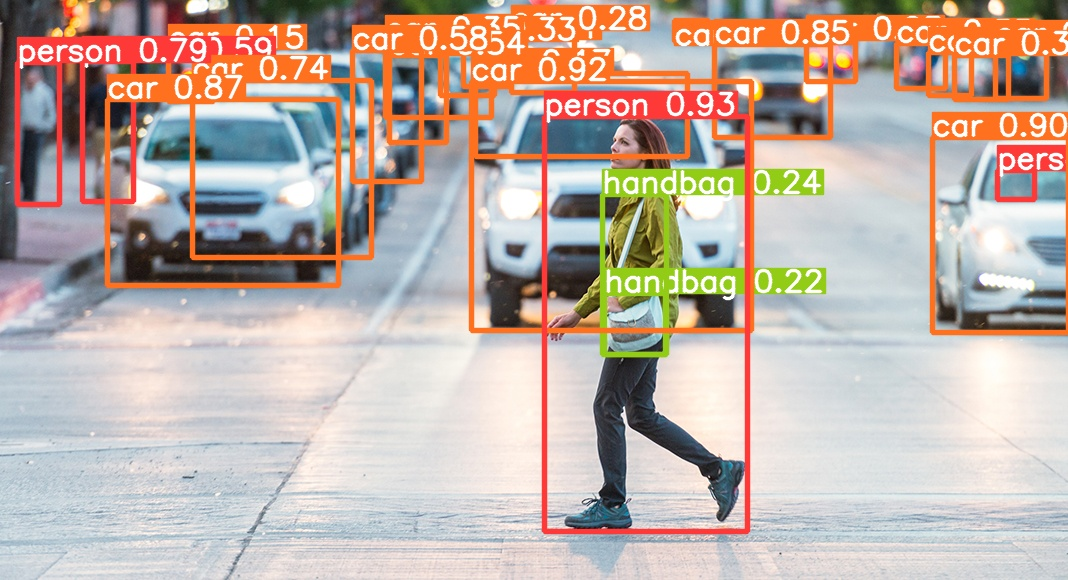

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/test_yolo.jpg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/test_yolo.jpg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/test_yolo.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
Traceback (most recent call last):
  File "/content/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov9/detect

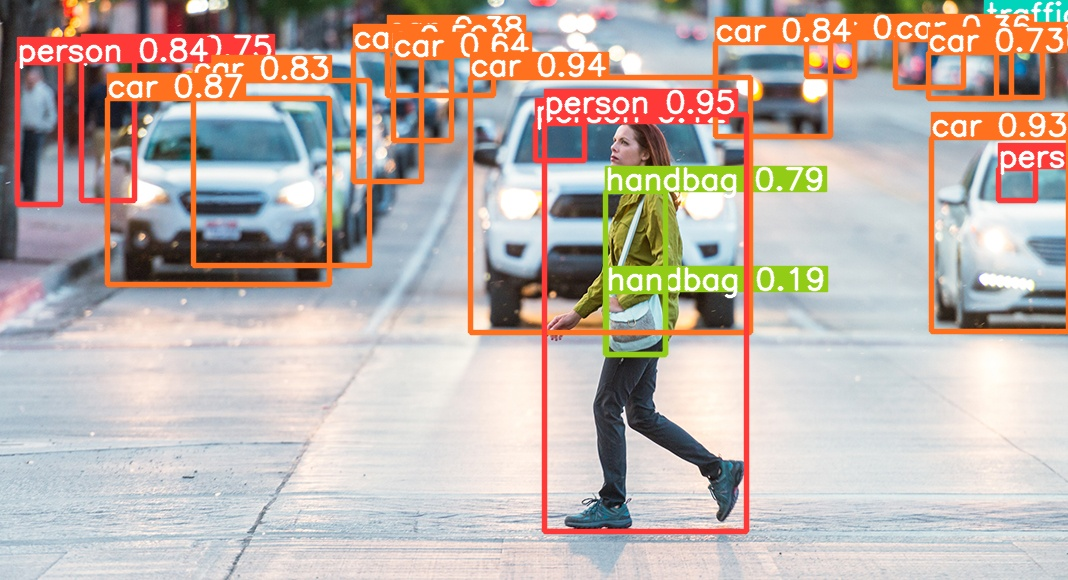

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/test_yolo.jpg", width=600)

## Authenticate and Download the Dataset

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("neevd").project("neevd")
version = project.version(1)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to NEEVD-1 in yolov9:: 100%|██████████| 3418/3418 [00:00<00:00, 5061.00it/s]


In [ ]:
!nvidia-smi

Sat Jun 15 13:34:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
torch.cuda.empty_cache()


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-06-15 13:35:55.167186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 13:35:55.167245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 13:35:55.168797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-15 13:35:55.176502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 13:35:57.048175: W

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path that contains folder you want to copy
%cd /content/drive/MyDrive/yolov9_MLPR
%cp -av /content/yolov9/runs /content/drive/MyDrive/yolov9_MLPR

/content/drive/MyDrive/yolov9_MLPR
'/content/yolov9/runs' -> '/content/drive/MyDrive/yolov9_MLPR/runs'
'/content/yolov9/runs/detect' -> '/content/drive/MyDrive/yolov9_MLPR/runs/detect'
'/content/yolov9/runs/detect/exp' -> '/content/drive/MyDrive/yolov9_MLPR/runs/detect/exp'
'/content/yolov9/runs/train' -> '/content/drive/MyDrive/yolov9_MLPR/runs/train'
'/content/yolov9/runs/train/exp' -> '/content/drive/MyDrive/yolov9_MLPR/runs/train/exp'
'/content/yolov9/runs/train/exp/weights' -> '/content/drive/MyDrive/yolov9_MLPR/runs/train/exp/weights'
'/content/yolov9/runs/train/exp/hyp.yaml' -> '/content/drive/MyDrive/yolov9_MLPR/runs/train/exp/hyp.yaml'
'/content/yolov9/runs/train/exp/opt.yaml' -> '/content/drive/MyDrive/yolov9_MLPR/runs/train/exp/opt.yaml'
'/content/yolov9/runs/train/exp/events.out.tfevents.1718457738.1269c573005b.11439.0' -> '/content/drive/MyDrive/yolov9_MLPR/runs/train/exp/events.out.tfevents.1718457738.1269c573005b.11439.0'
'/content/yolov9/runs/train/exp/labels_correlogra

## Examine Training Results

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1718457738.1269c573005b.11439.0  labels_correlogram.jpg  opt.yaml
hyp.yaml					     labels.jpg		     weights


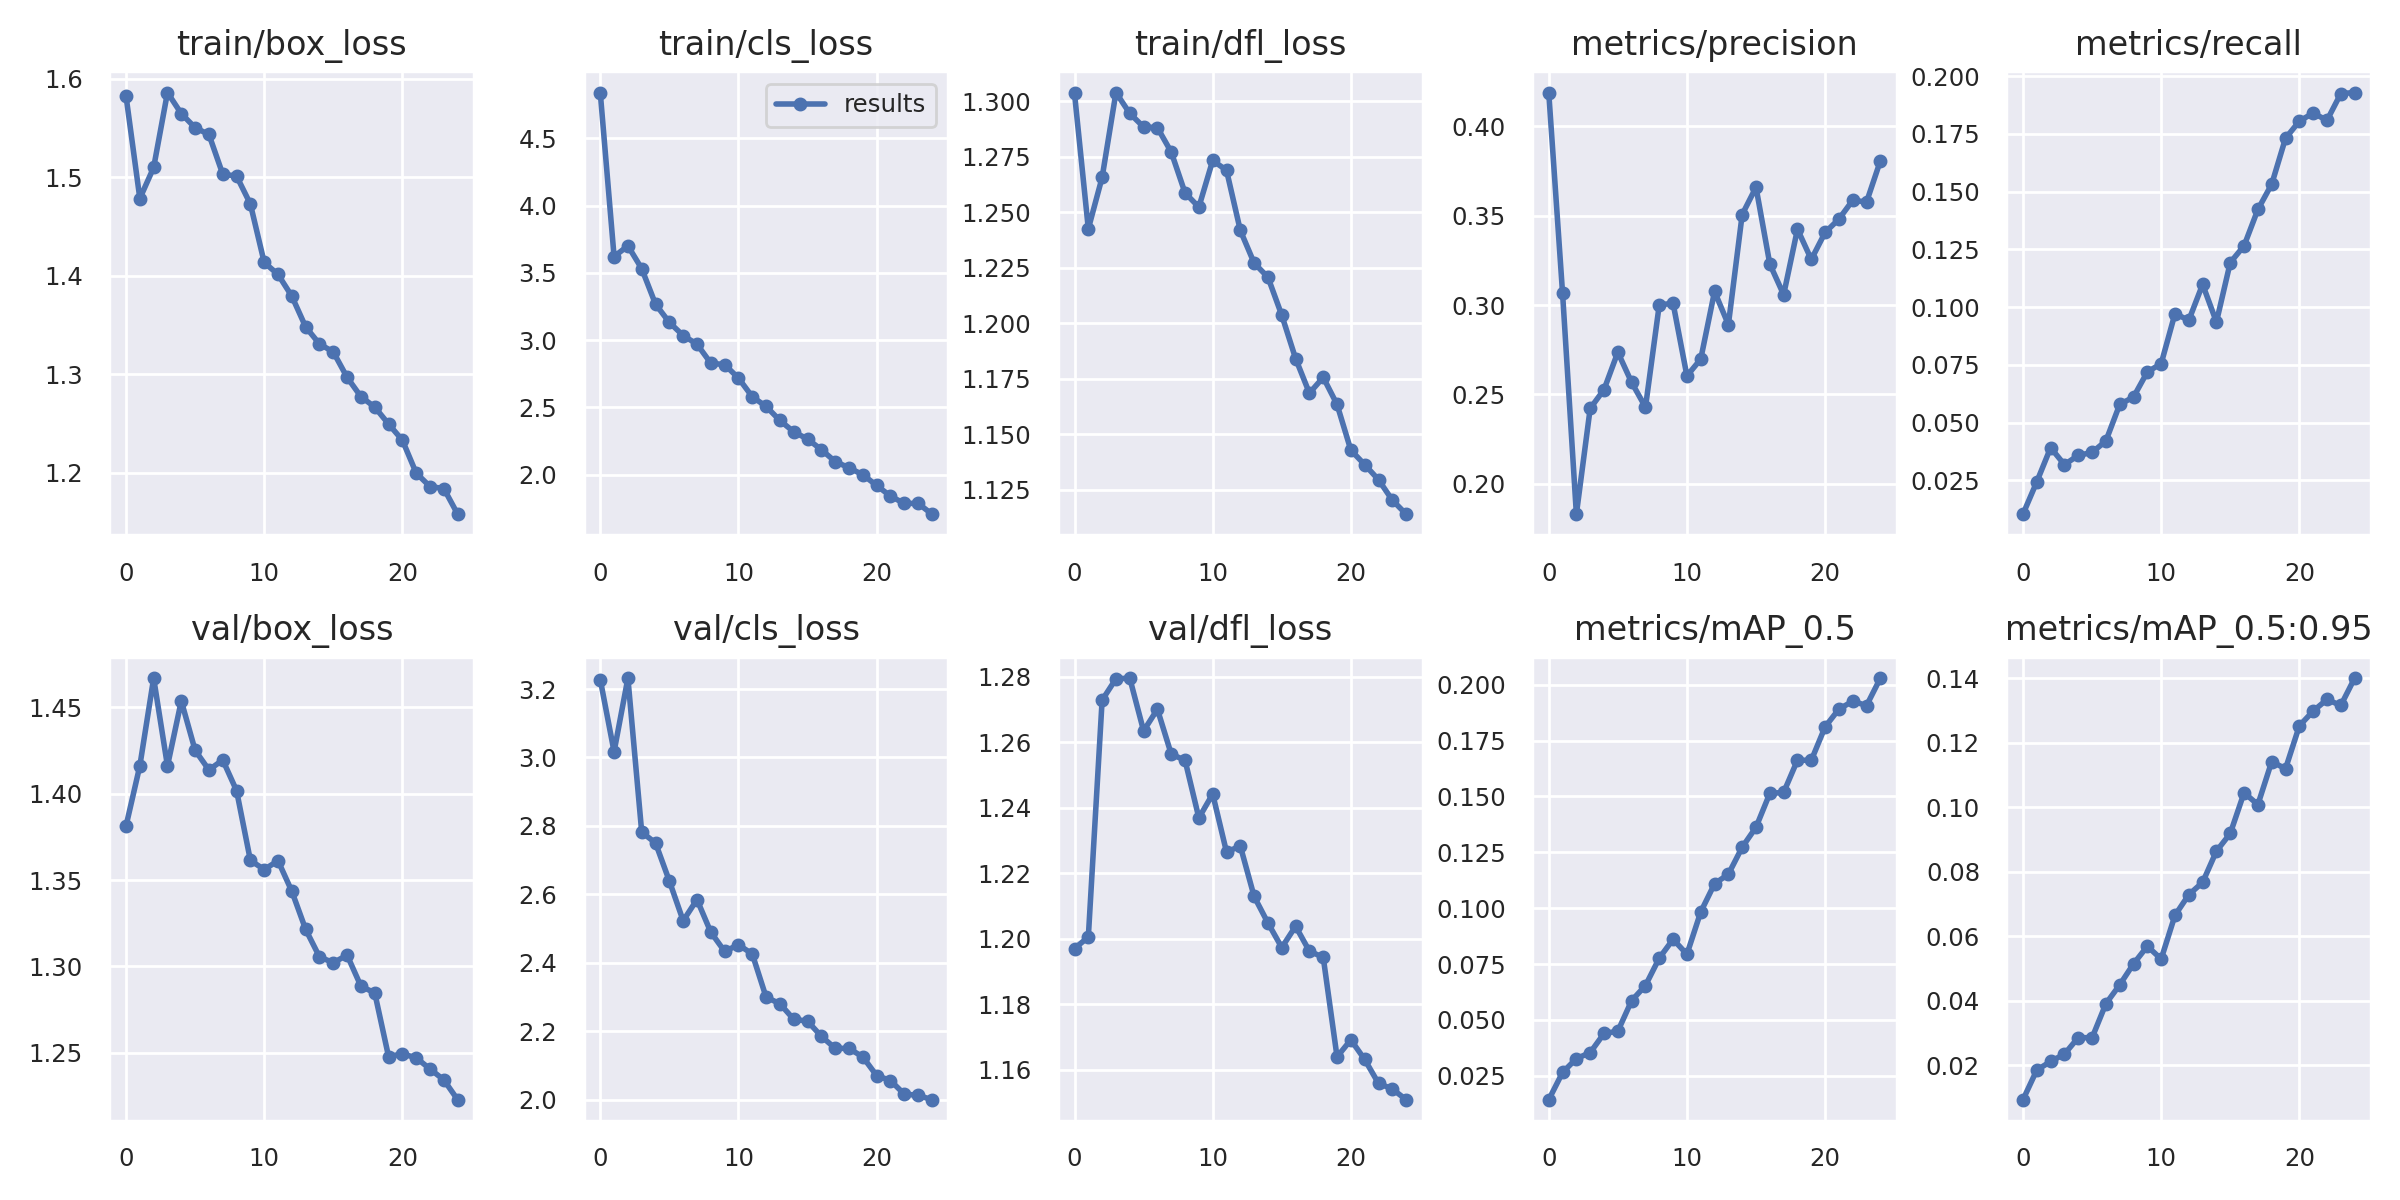

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

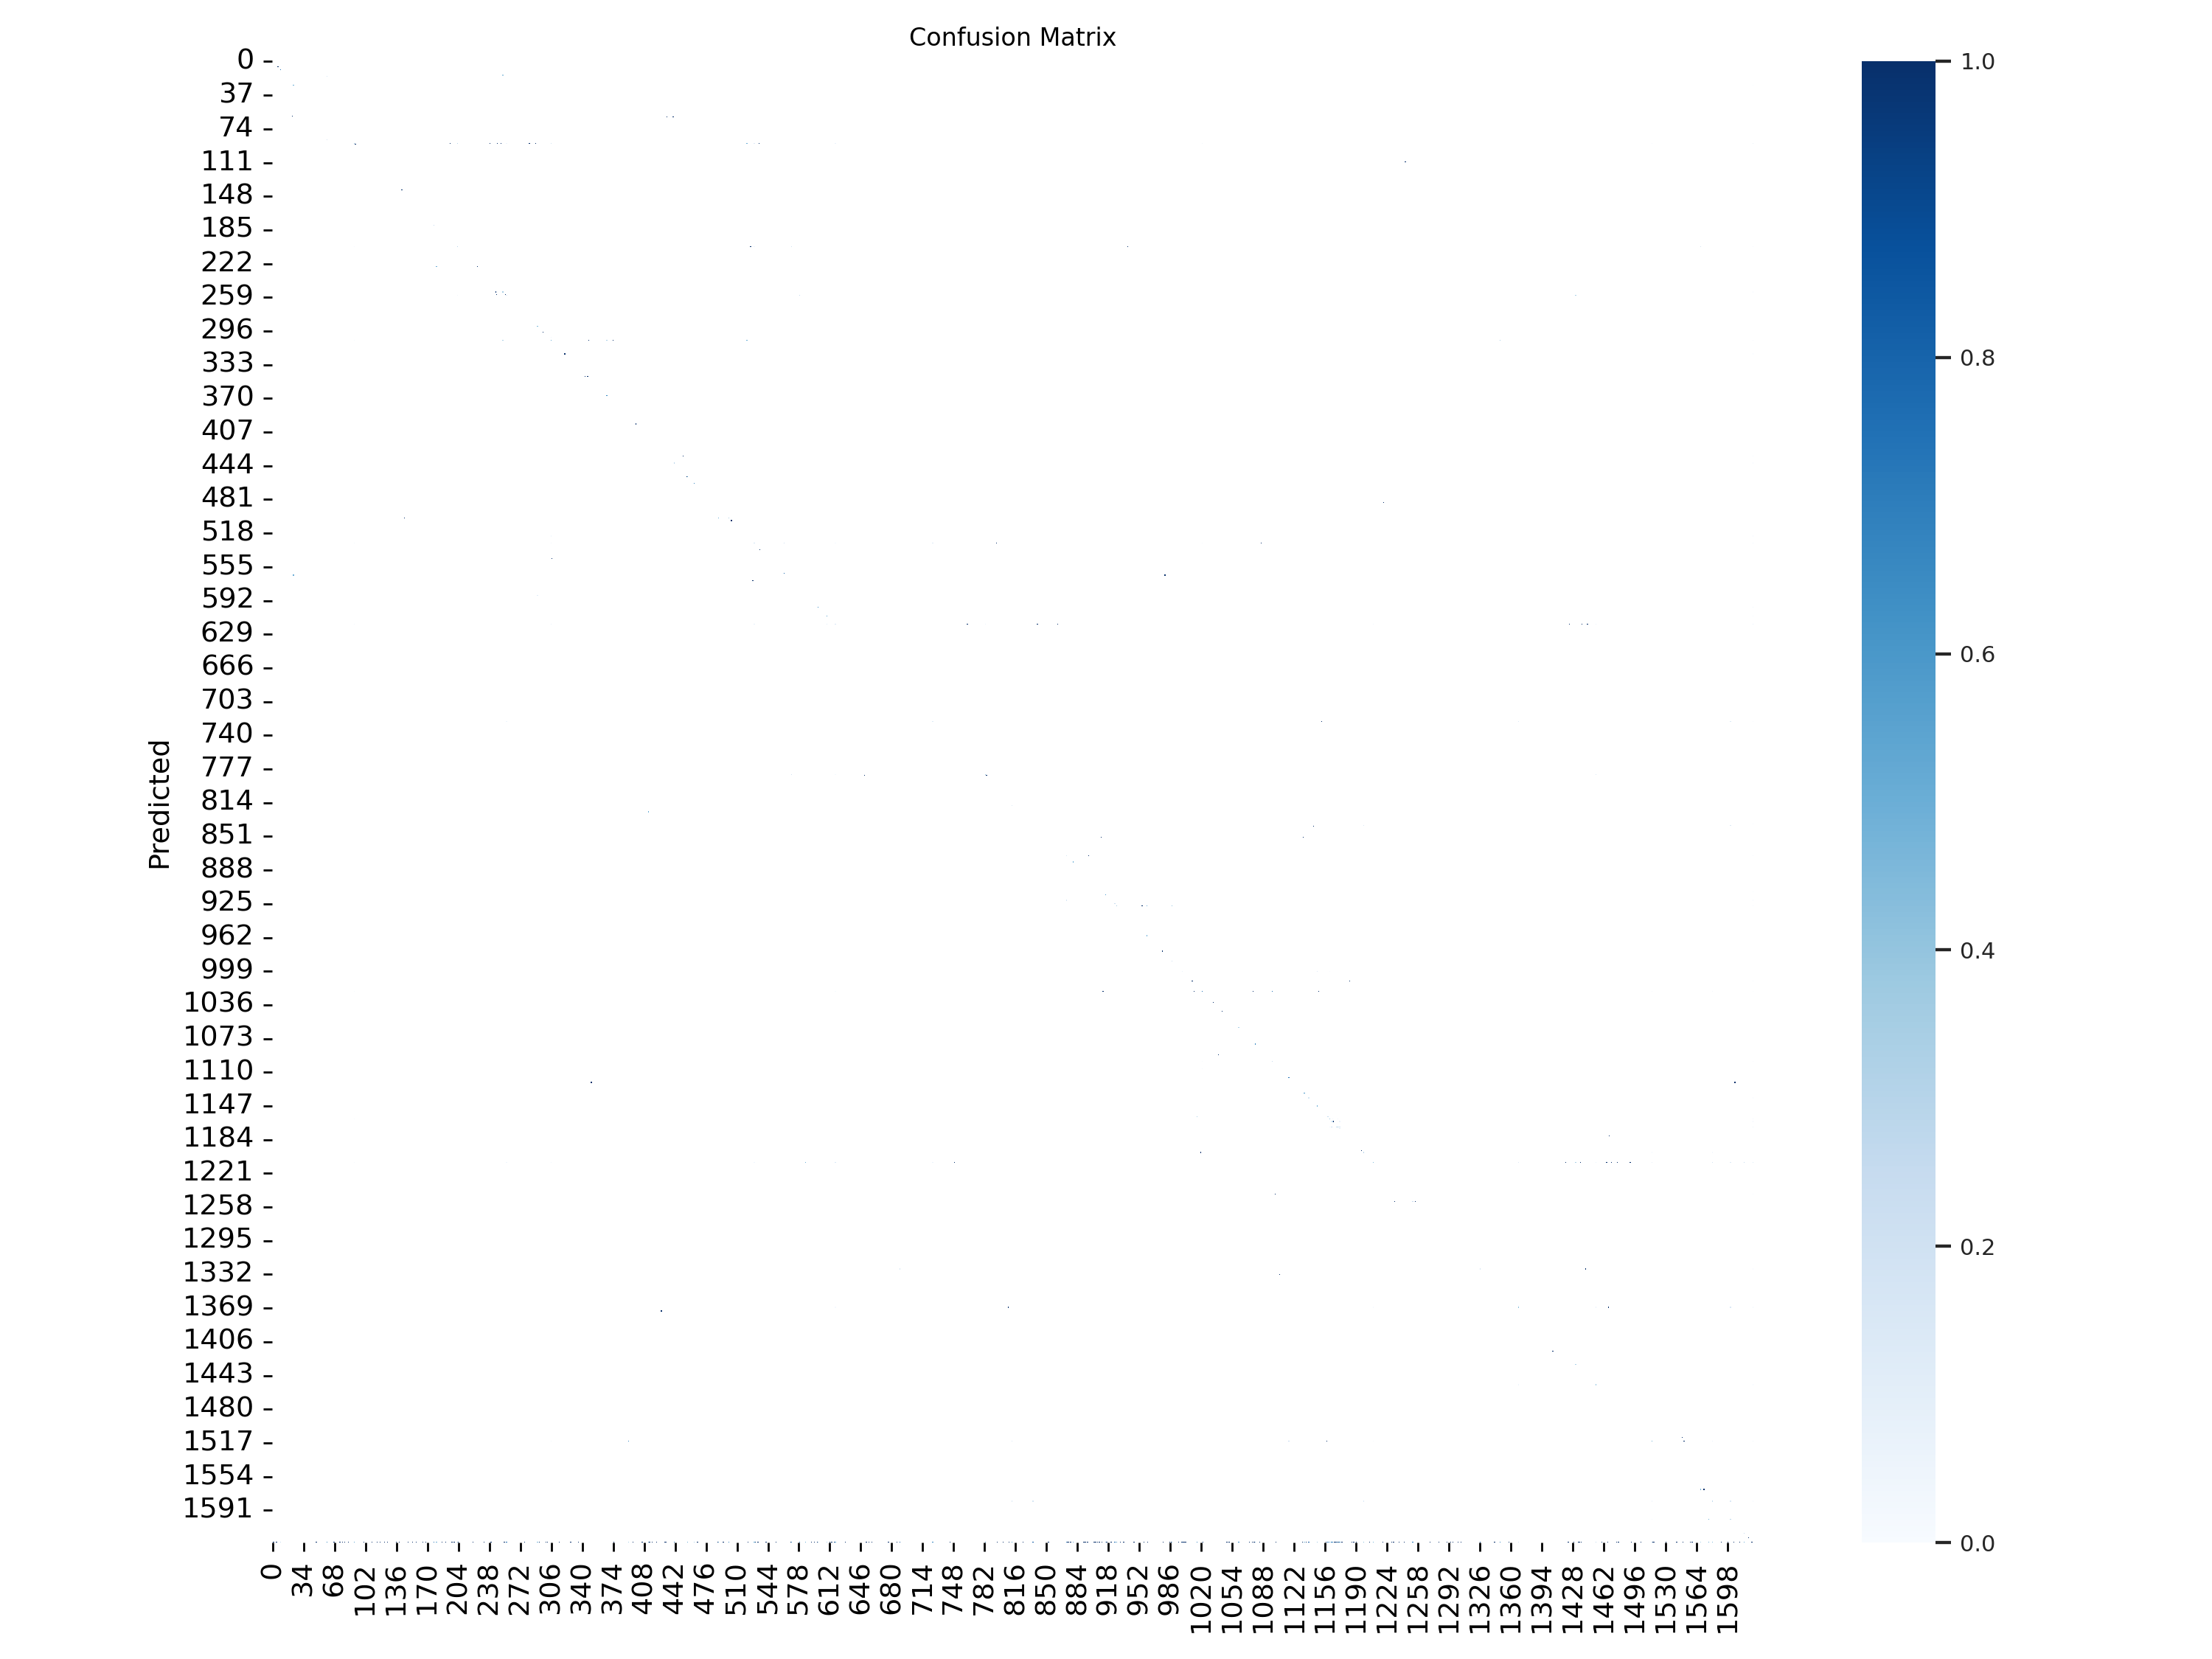

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

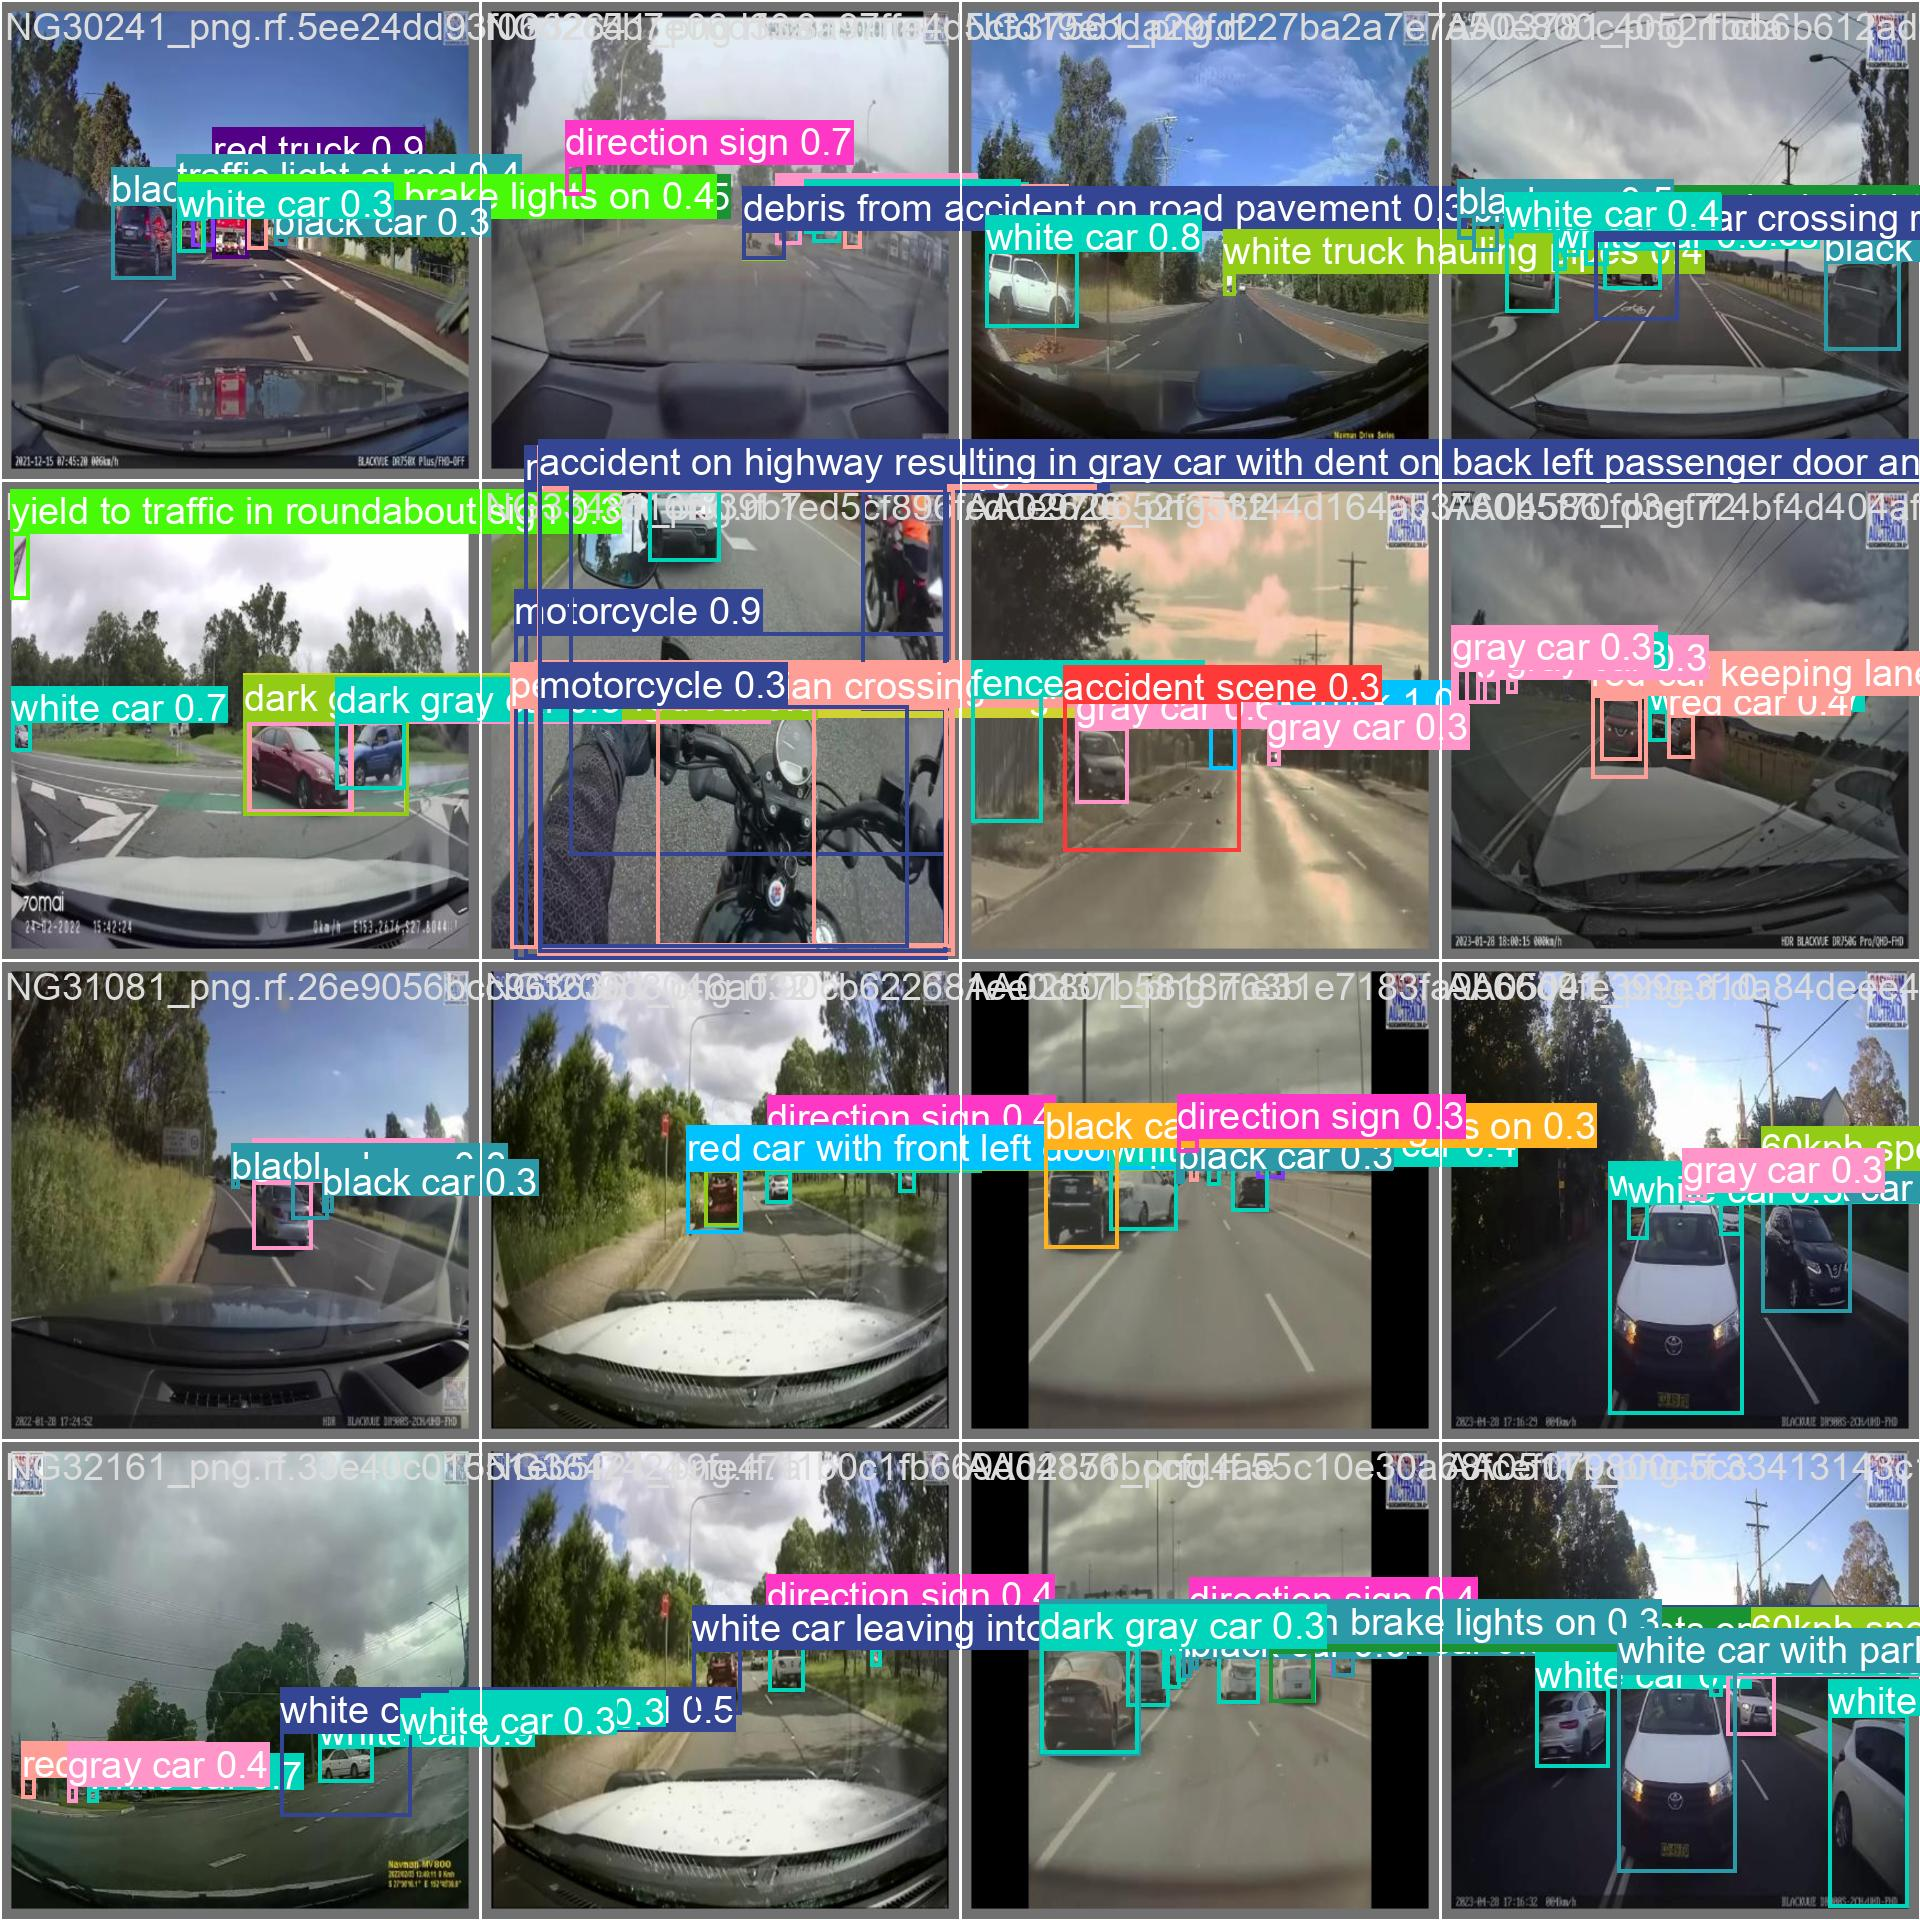

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt

/content/yolov9
val: data=/content/yolov9/NEEVD-1/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 26664606 parameters, 0 gradients, 109.5 GFLOPs
val: Scanning /content/yolov9/NEEVD-1/valid/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 22/22 [00:13<00:00,  1.68it/s]
                   all        170       2308      0.382      0.194      0.203       0.14
Speed: 0.7ms pre-process, 39.4ms inference, 15.1ms NMS per image

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/NEEVD-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 26664606 parameters, 0 gradients, 109.5 GFLOPs
image 1/170 /content/yolov9/NEEVD-1/test/images/AA00351_png.rf.35e02836d1e8401ee108bddda7fb0518.jpg: 1280x1280 1 black car, 1 direction sign, 1 gray car, 2 overhead bridges, 3 traffic lights, 2 traffic light at greens, 2 traffic light at reds, 1 traffic light at red for vehicles turning right, 1 white bus with front

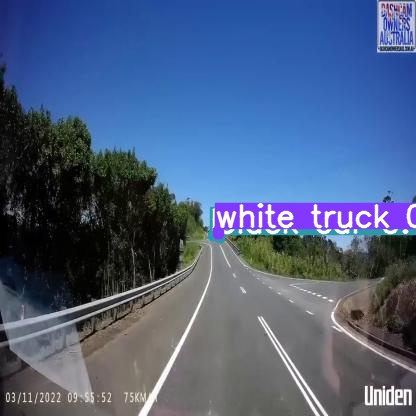

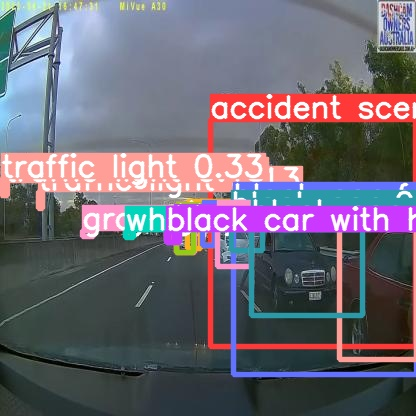

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))